## Introduction
Customer churn is a critical problem for subscription-based businesses, particularly in the banking and financial services industry. Retaining existing customers is significantly more cost-effective than acquiring new ones. This project aims to build a predictive model to identify customers who are likely to leave the bank (churn), allowing businesses to take proactive measures to improve customer.


## Business Objective
* The goal would be to identify which customers are most likely to churn (leave the service) and understand the key factors driving their decision to leave. Churn Reduction through Predictive Analytics
* Churn refers to the process by which a customer stops doing business with a company.

## Business Value:* 
Customer retention is critical for a bank’s profitability. Predicting which customers are likely to churn can help the bank take proactive steps (e.g., offering personalized services or incentives) to retain valuable customers.

## Importing all the required Dependencies


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_curve,auc,precision_recall_curve, confusion_matrix ,precision_score, recall_score, f1_score

## Data Representation 

In [2]:
# Load and read the dataset
data = pd.read_csv("C:\\Users\\asus\\Downloads\\archive (7)\\Churn_Modelling.csv")

In [3]:
# Converting into Dataframe
df=pd.DataFrame(data)

In [4]:
## First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Basic Info. About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Wrangling

In [6]:
df.duplicated().sum()

0

In [7]:
## Checking Null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking Outlier

In [8]:
check_outliers= ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

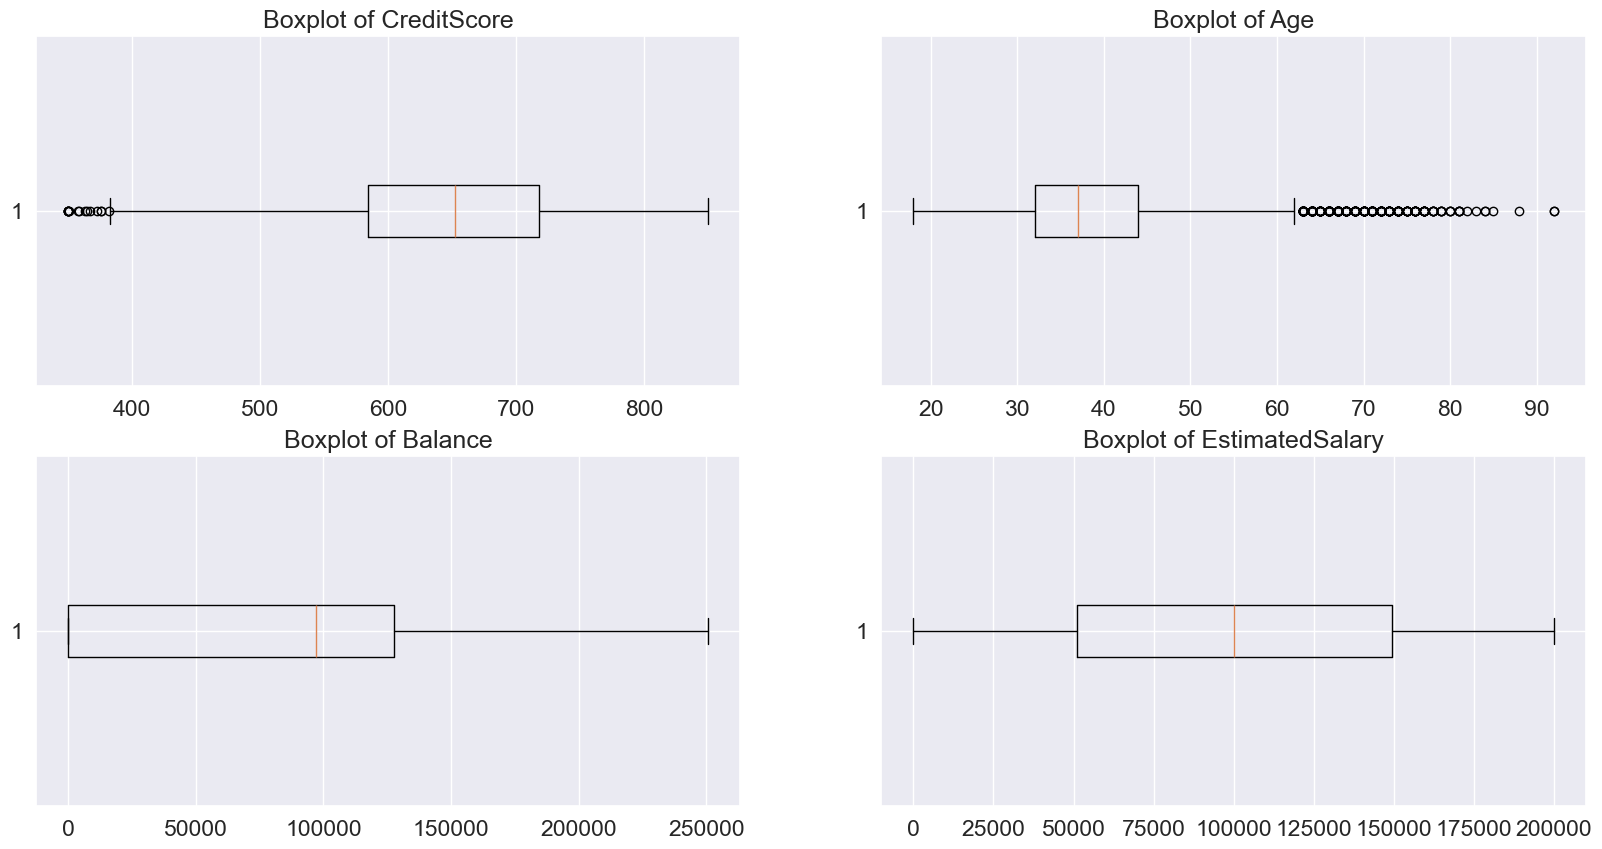

In [9]:
plt.figure(figsize=(20,10))
for ind,val in enumerate(check_outliers):
    plt.subplot(2,2,ind+1)
    plt.boxplot(df[val],vert=False)
    plt.title(f'Boxplot of {val}')

# plt.tight_layout()
plt.show()

## Exploratory Data Analysis

* The goal of EDA is to better understand the distributions of features, identify trends or patterns, and explore relationships between features and the target variable (Exited)

#### Univariate Analysis

#### Credit Score Column

In [10]:
## Statistic of Features
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

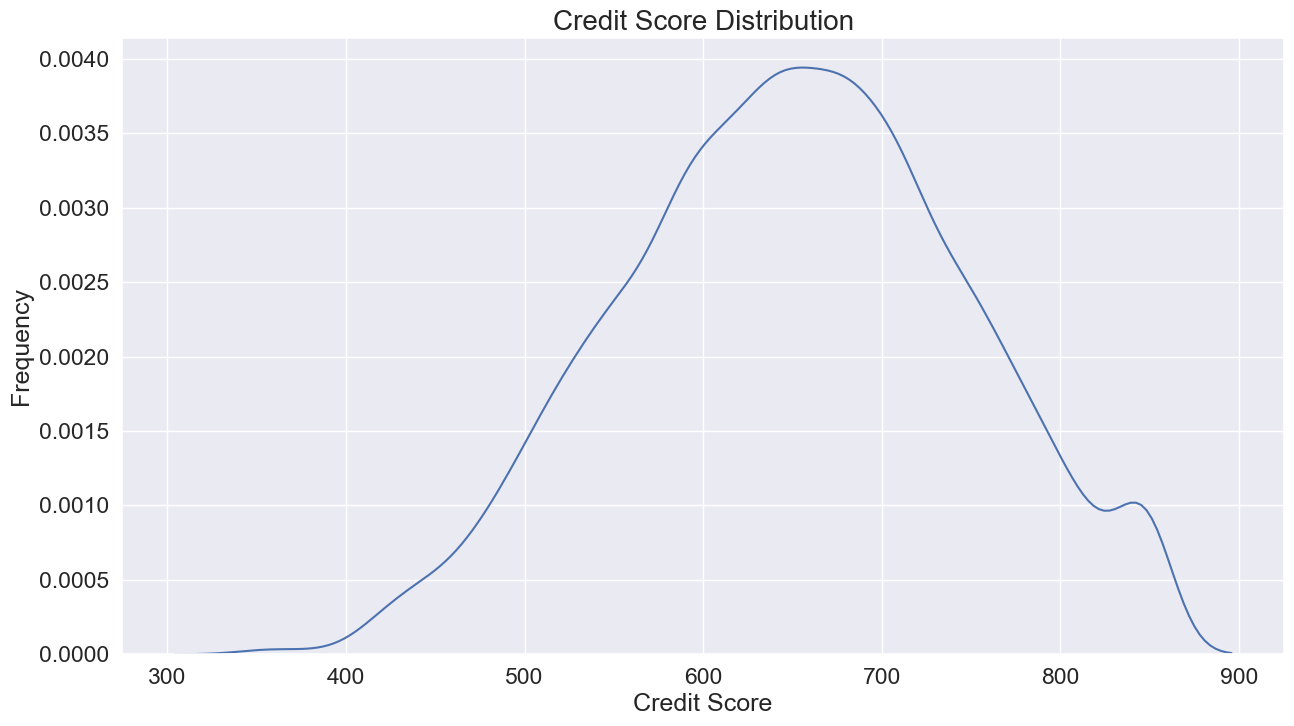

In [11]:
## Plot the Figure
plt.figure(figsize=(15,8))
sns.kdeplot(df['CreditScore'])
plt.title('Credit Score Distribution',fontsize=20)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

> Conclusion:- 
* The distribution of credit scores is slightly skewed to the right, meaning more customers have Healthy credit scores (600-700)
* This could indicate that most customers have a good credit history.

#### Geography Column

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

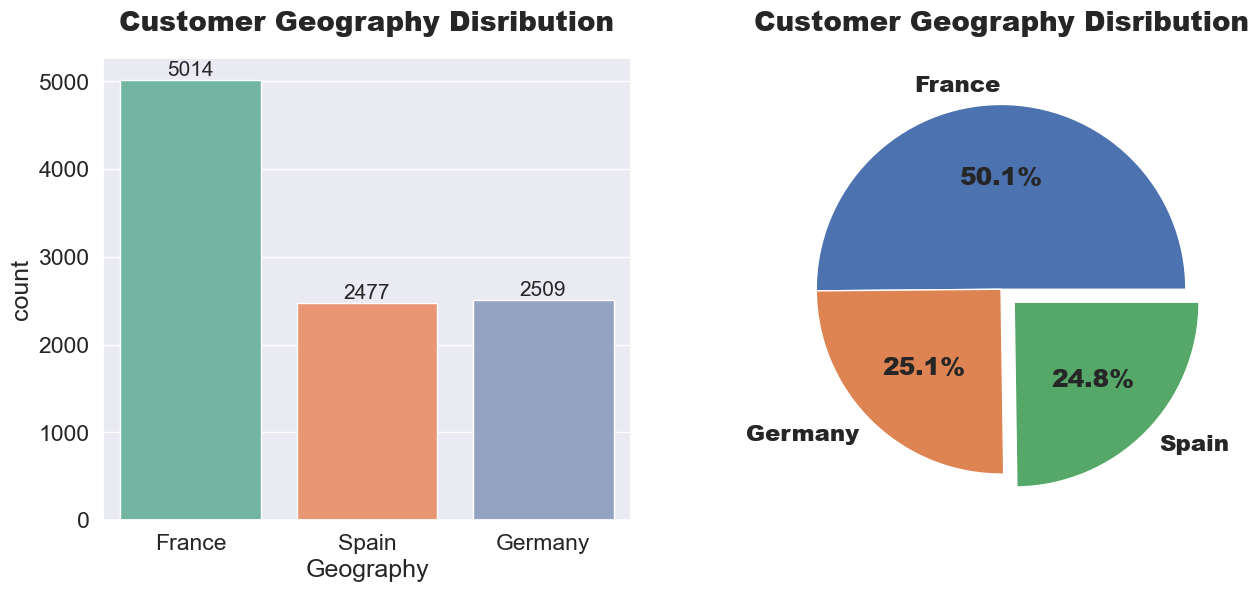

In [13]:
## Ploting the Figure
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax= sns.countplot(data= df, x= 'Geography',palette='Set2')
for container in ax.containers:
    ax.bar_label(container, size= 15)
plt.title('Customer Geography Disribution',fontweight= 'black',size=20, pad=20)


plt.subplot(1,2,2)
plt.pie(df['Geography'].value_counts(), autopct='%1.1f%%',labels=df['Geography'].value_counts().index, explode=[0,0,0.1],textprops={"fontweight":"black"})
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

#### Gender Column

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

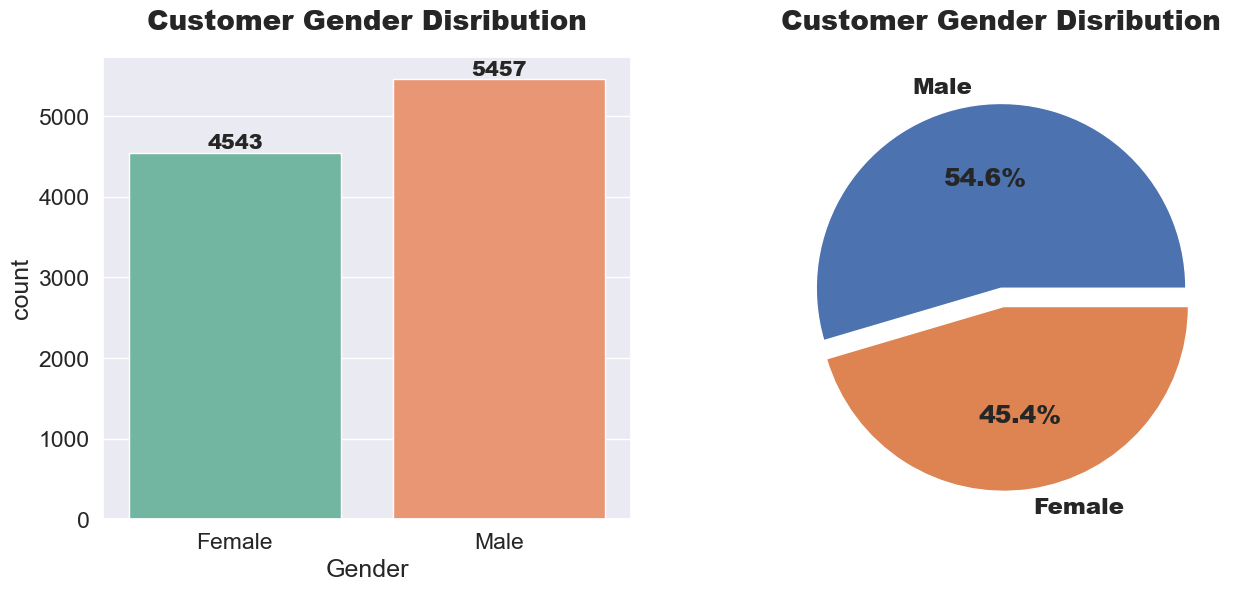

In [15]:
## Plot the Gender Column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax= sns.countplot(data=df,x='Gender',palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container,fontweight='black',size=15)
plt.title('Customer Gender Disribution',fontweight= 'black',size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',labels=df['Gender'].value_counts().index, explode=[0,0.1],textprops={'fontweight':'black'})
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

#### Age Column

In [16]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

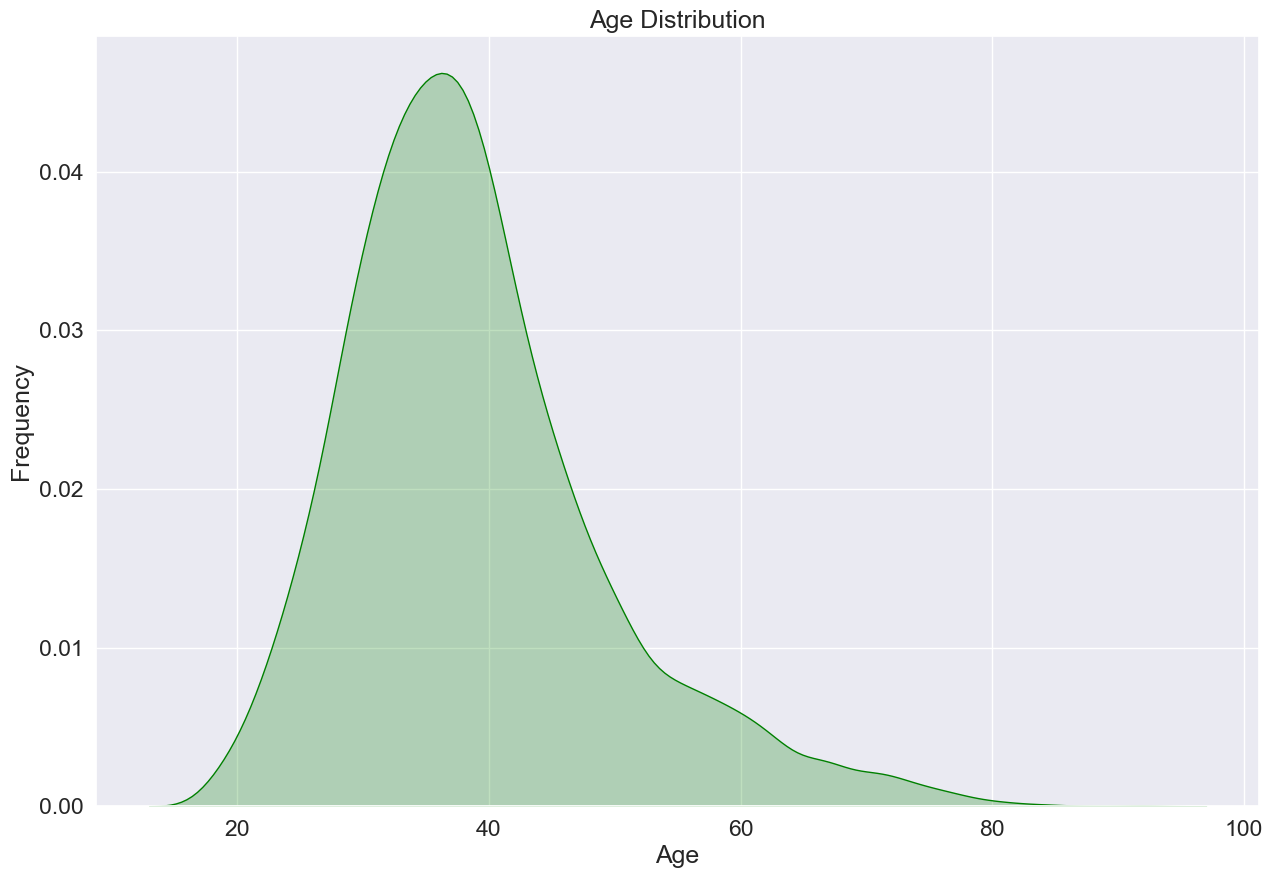

In [17]:
##Plot the Age Column
plt.figure(figsize=(15,10))
sns.kdeplot(df['Age'],fill=True,color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> Conclusion :-
* The age distribution exhibits a peak around 35–40 years, with a gradual decline in frequency as age increases.
* The right-skewed nature of the distribution indicates that while younger and middle-aged individuals dominate, older customers are relatively fewer.

#### Tenure Column

In [18]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

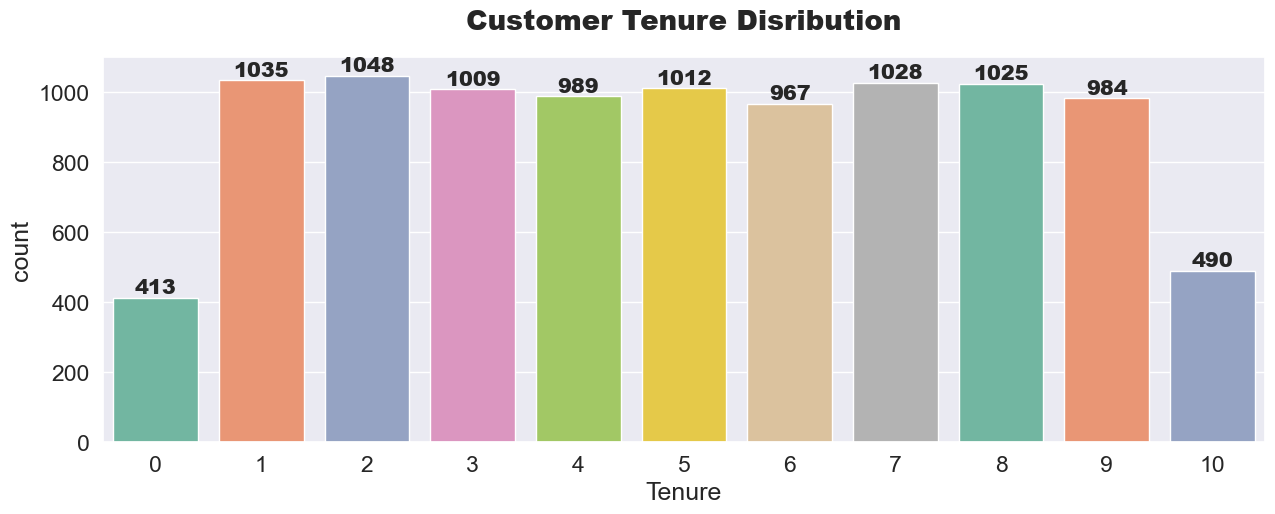

In [19]:
## PLot the Tenure Column
plt.figure(figsize=(15,5))
ax= sns.countplot(data=df, x='Tenure',palette='Set2')
for container in ax.containers:
    ax.bar_label(container,fontweight='black',size=15)
plt.title("Customer Tenure Disribution",fontweight="black",size=20,pad=20)
plt.show()

> Conclusion :-
* The uniform distribution suggests that the bank has a balanced customer base across different tenure lengths.


#### Balance Column

In [20]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

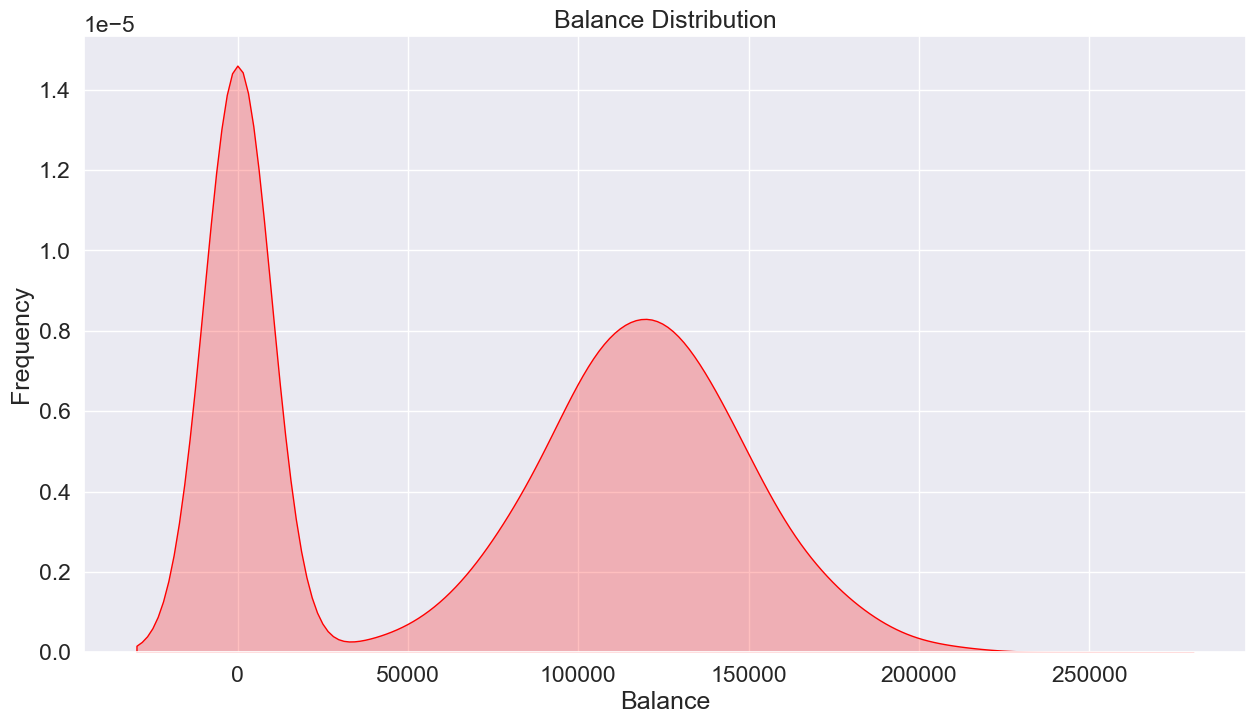

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(data= df, x='Balance', fill=True, color='Red')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

> Conclusion :-

> A bimodal distribution in the Balance column suggests two distinct customer segments:
* 
Low-balance customers who may be more likely to churn
* 
High-balance customers who are likely more engaged and loyal.

#### No_Of_Products Column

In [22]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

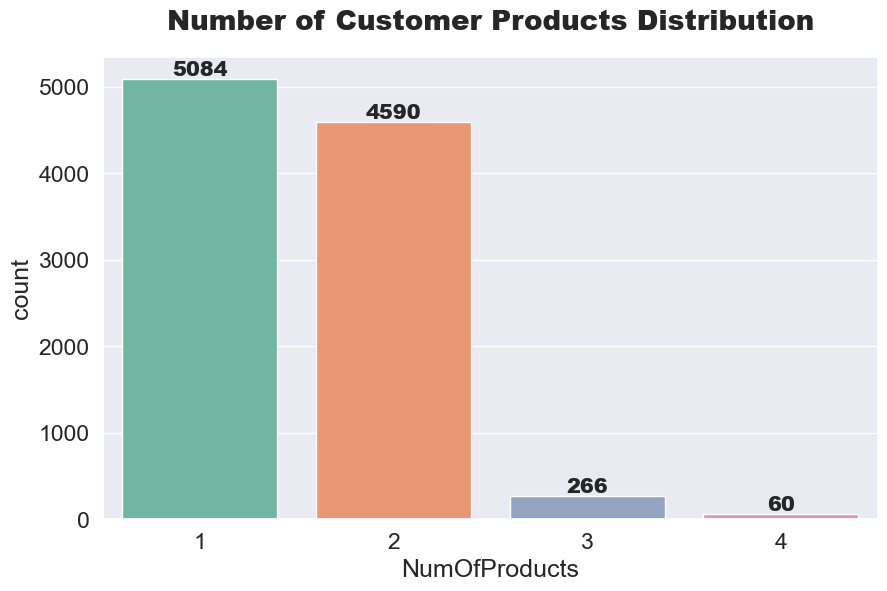

In [23]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(data = df, x = 'NumOfProducts', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black', size = 15)
plt.title('Number of Customer Products Distribution', fontweight = 'black', size = 20, pad = 20)
plt.show()

#### Has_Card Column

In [24]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

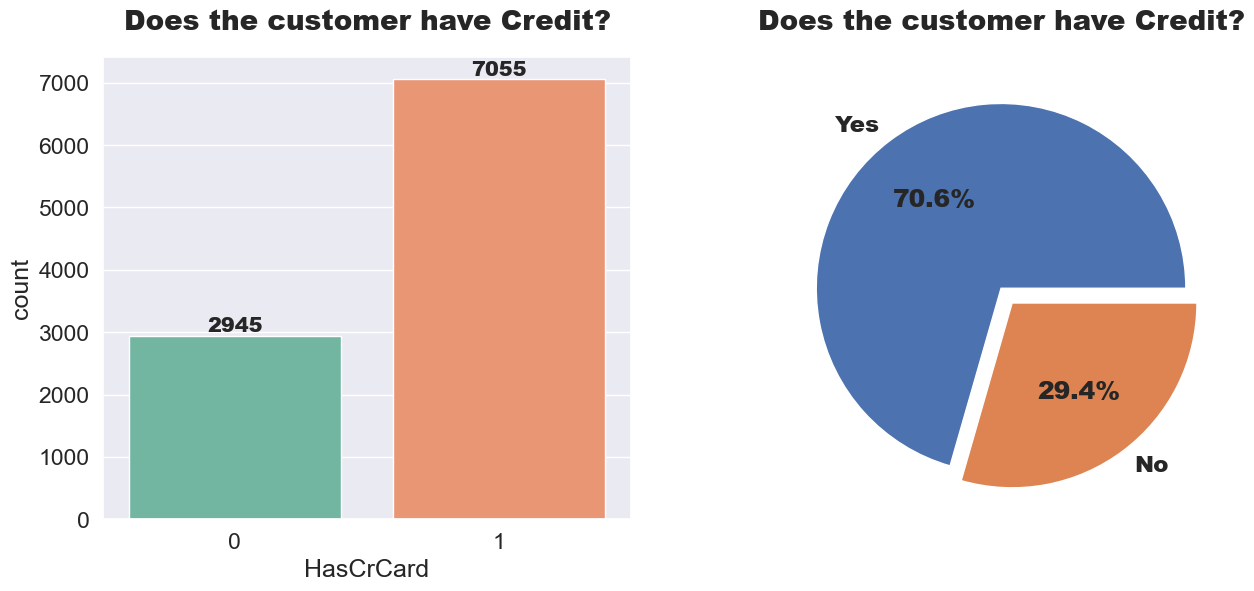

In [25]:
## Plot the Has_Card Column
plt.figure(figsize = (15, 6))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'HasCrCard', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size = 15)
plt.title("Does the customer have Credit?",fontweight="black",size=20,pad=20)


plt.subplot(1,2,2)
plt.pie(df['HasCrCard'].value_counts(), autopct = '%1.1f%%', labels = ['Yes', 'No'], explode = [0,0.1],colors=sns.set_palette("Set2"), textprops={"fontweight":"black"})
plt.title("Does the customer have Credit?",fontweight="black",size=20,pad=20)

plt.show()

#### Is_Active_Member Column

In [26]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

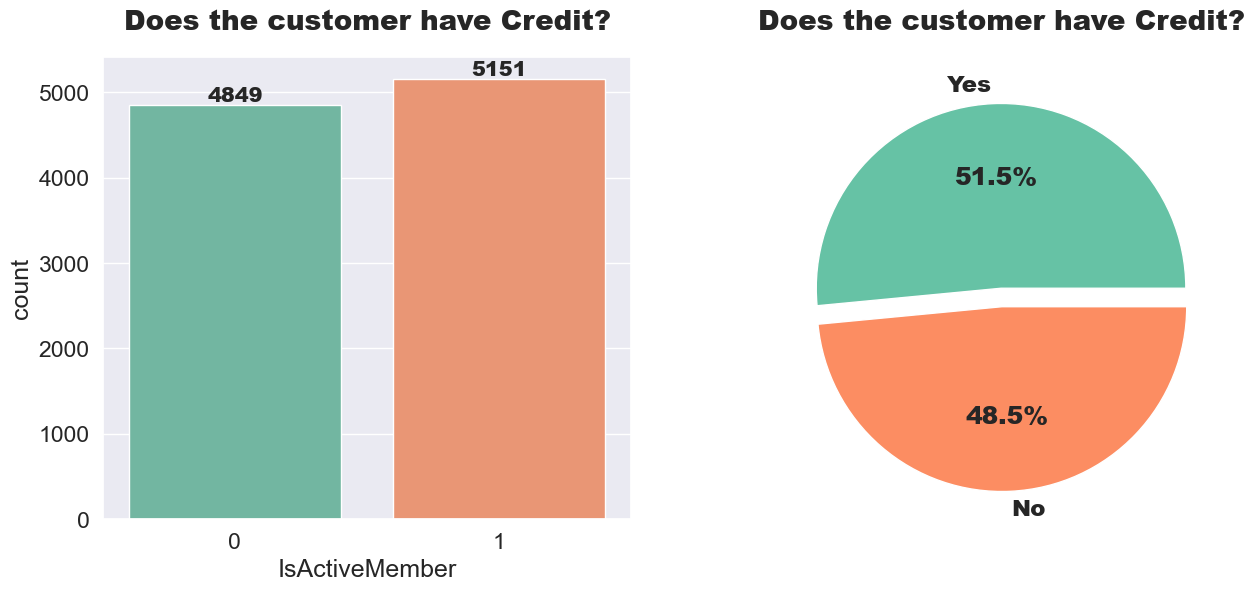

In [27]:
## Plot the Is_Active_Member Column
plt.figure(figsize = (15, 6))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'IsActiveMember', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size = 15)
plt.title("Does the customer have Credit?",fontweight="black",size=20,pad=20)


plt.subplot(1,2,2)
plt.pie(df['IsActiveMember'].value_counts(), autopct = '%1.1f%%', labels = ['Yes', 'No'], explode = [0,0.1], textprops={"fontweight":"black"})
plt.title("Does the customer have Credit?",fontweight="black",size=20,pad=20)

plt.show()

#### Estimated_Salary Column

In [28]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

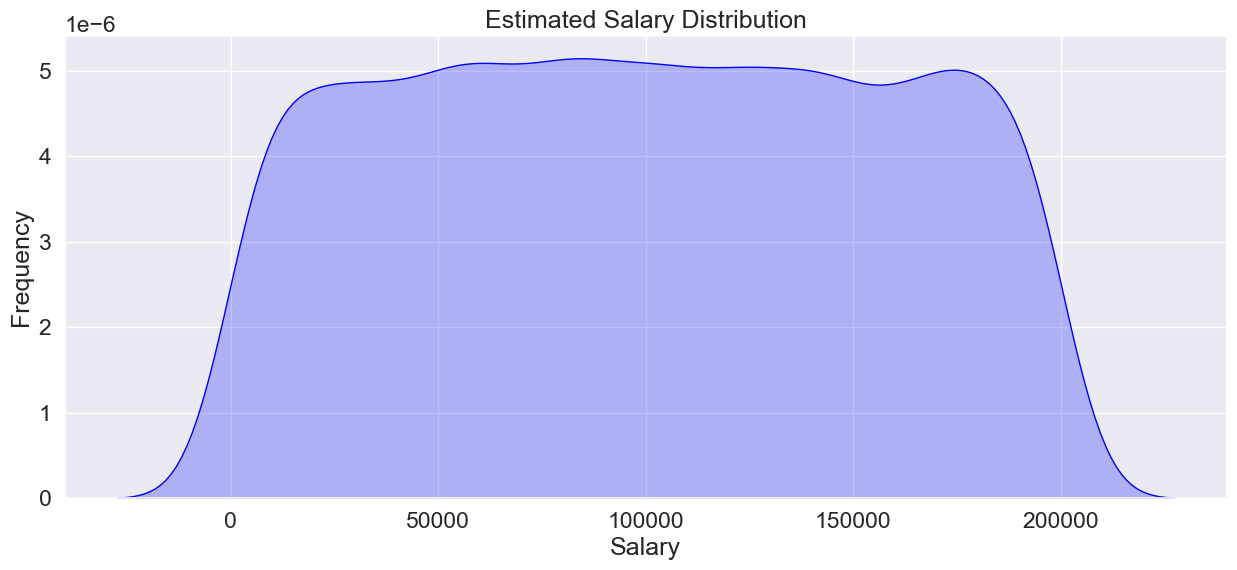

In [29]:
## Plot the Estimated_Salary Column
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x='EstimatedSalary',fill=True, color='Blue')
plt.title('Estimated Salary Distribution')
plt.xlabel("Salary")
plt.ylabel('Frequency')
plt.show()

#### Exited column

In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

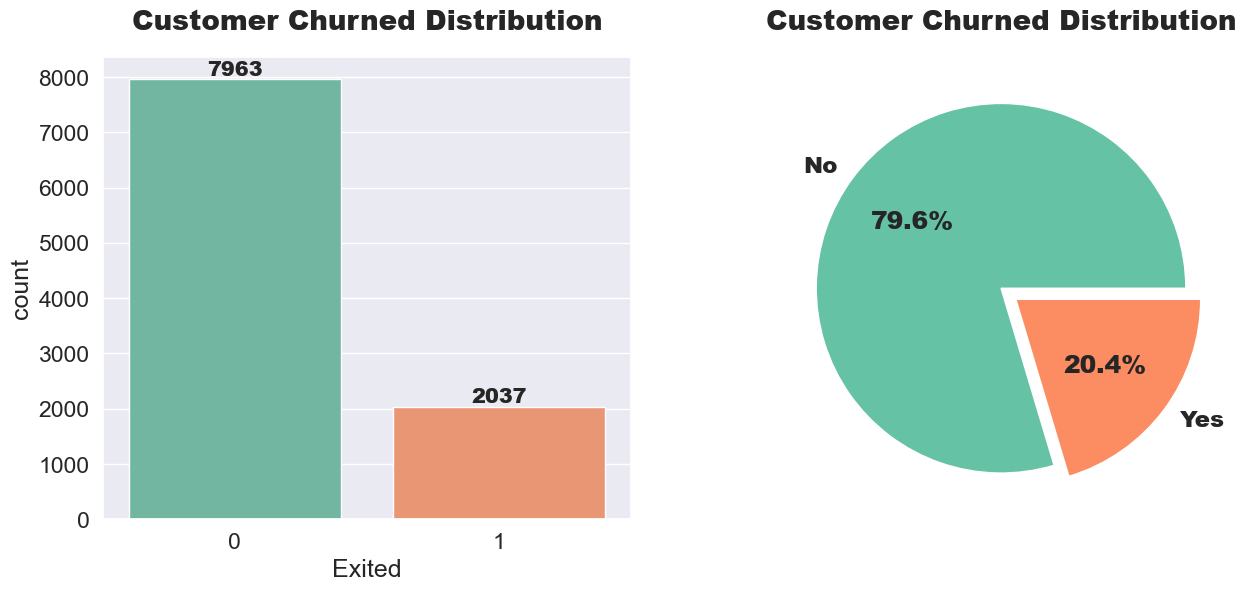

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax= sns.countplot(data=df, x='Exited', fill=True, palette='Set2')
for container in ax.containers:
    ax.bar_label(container,fontweight="black", size = 15)
plt.title("Customer Churned Distribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(df['Exited'].value_counts(), autopct = '%1.1f%%', labels = ['No', 'Yes'], explode = [0,0.1], textprops={"fontweight":"black"})
plt.title("Customer Churned Distribution",fontweight="black",size=20,pad=20)
plt.show()

### Bivariate Analysis

#### Numerical Features vs. Exited

In [32]:
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

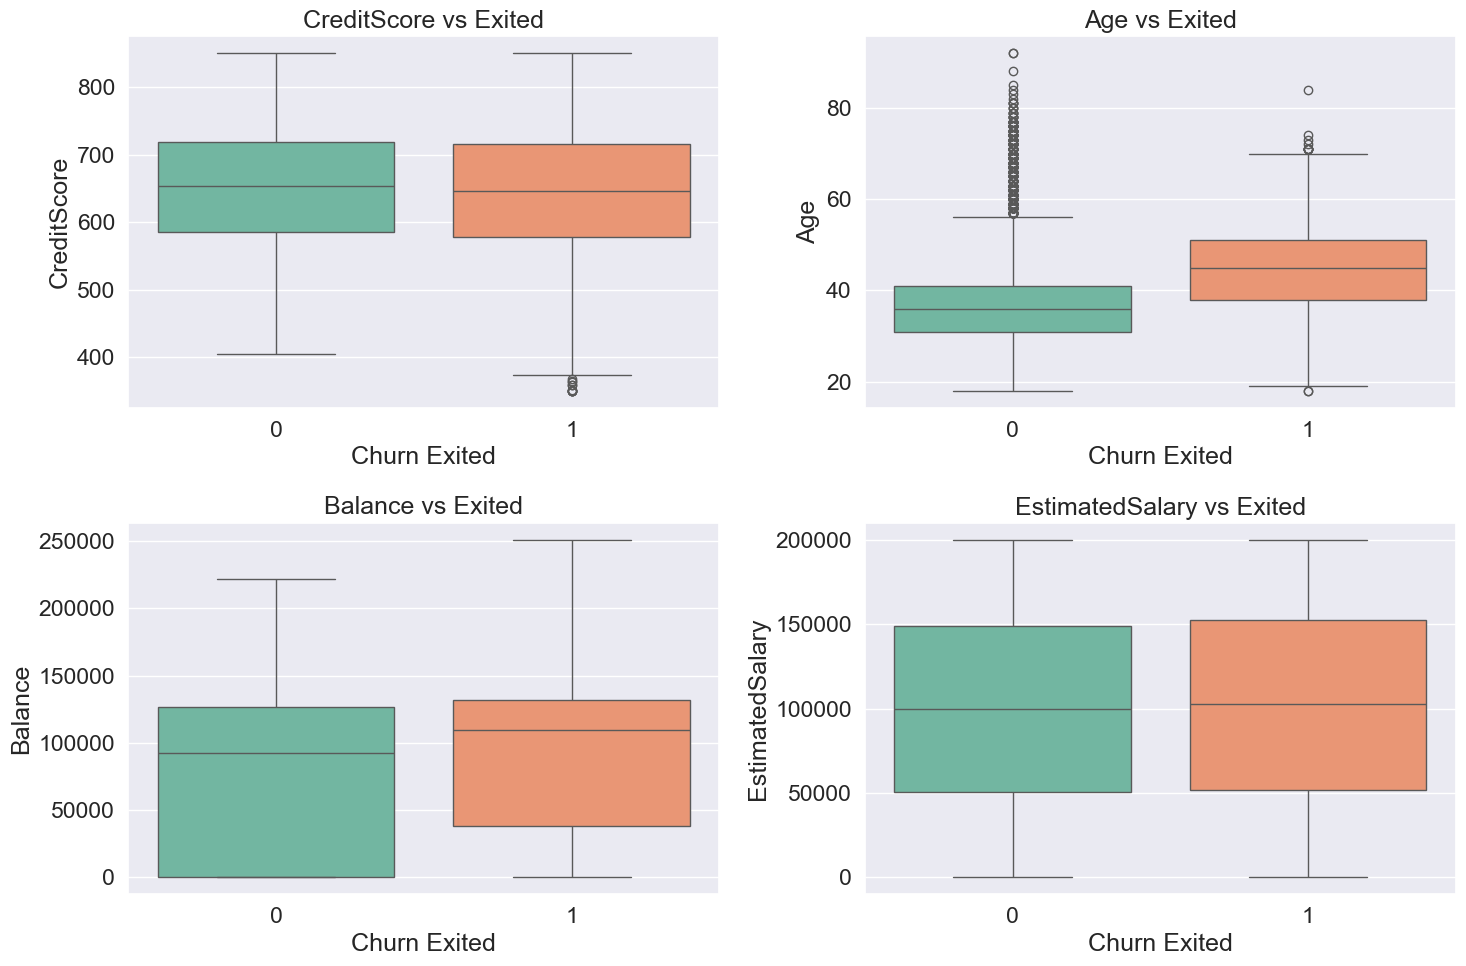

In [33]:
plt.figure(figsize=(15,10))
for ind,val in enumerate(cols):
    plt.subplot(2,2,ind+1)
    sns.boxplot(data=df, x='Exited',y=val,palette='Set2')
    plt.title(f'{val} vs Exited')
    plt.xlabel('Churn Exited')

plt.tight_layout()
plt.show()

### Categorical Features vs. Churn (Exited)

In [34]:
cat_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

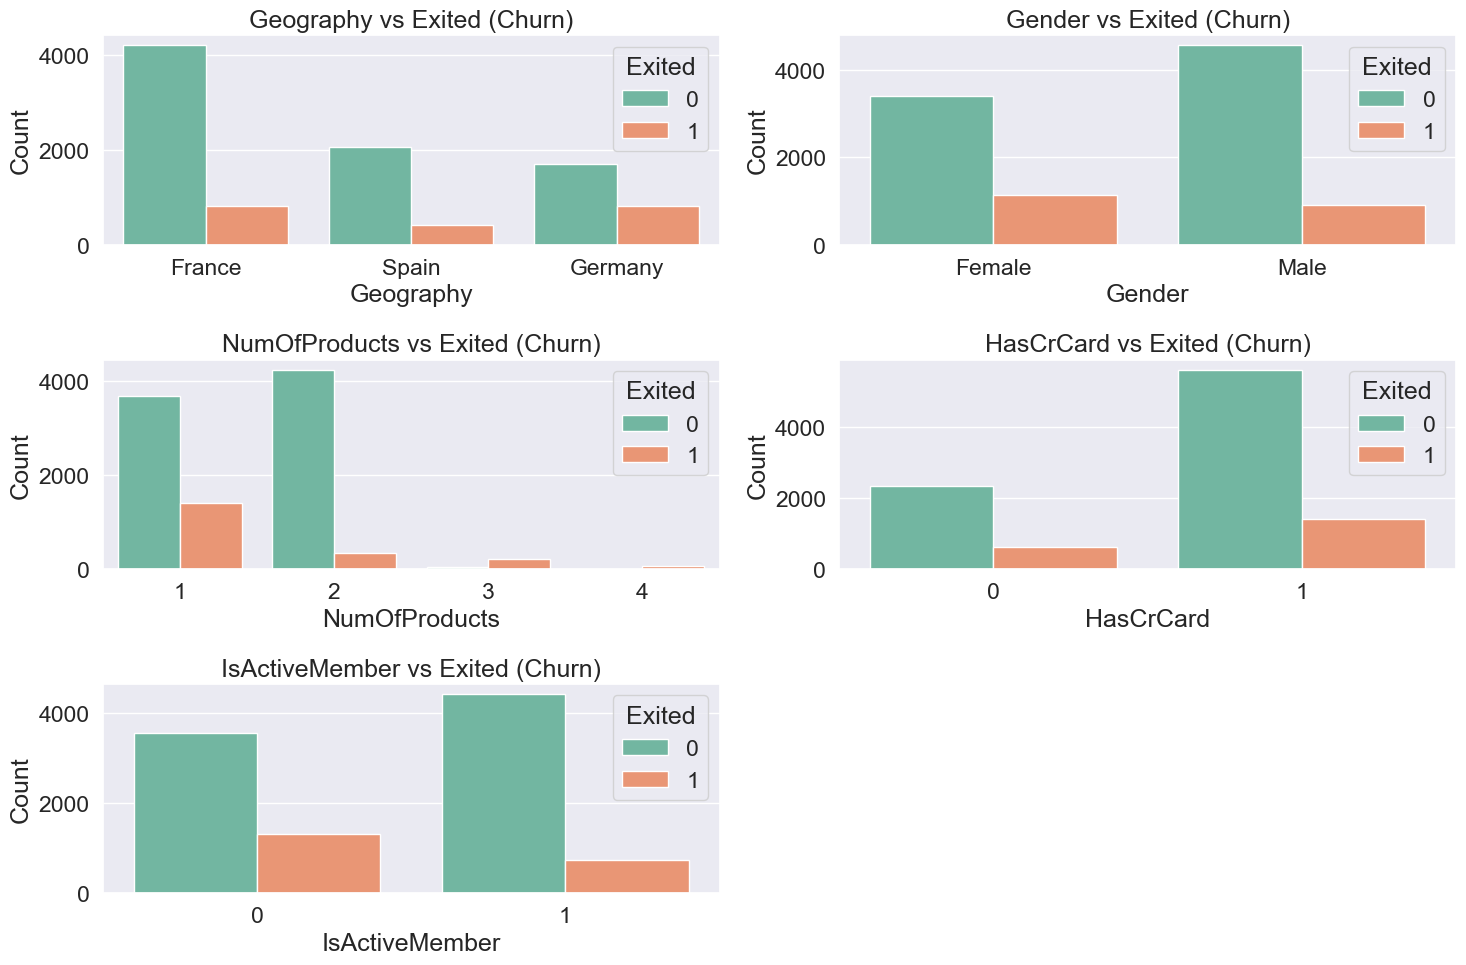

In [35]:
plt.figure(figsize = (15, 10))
for ind, val in enumerate(cat_cols):
    plt.subplot(3,2, ind + 1)
    sns.countplot(data = df, x = val, hue = 'Exited', palette = 'Set2')
    plt.title(f'{val} vs Exited (Churn)')
    plt.xlabel(val)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Multivariate Analysis

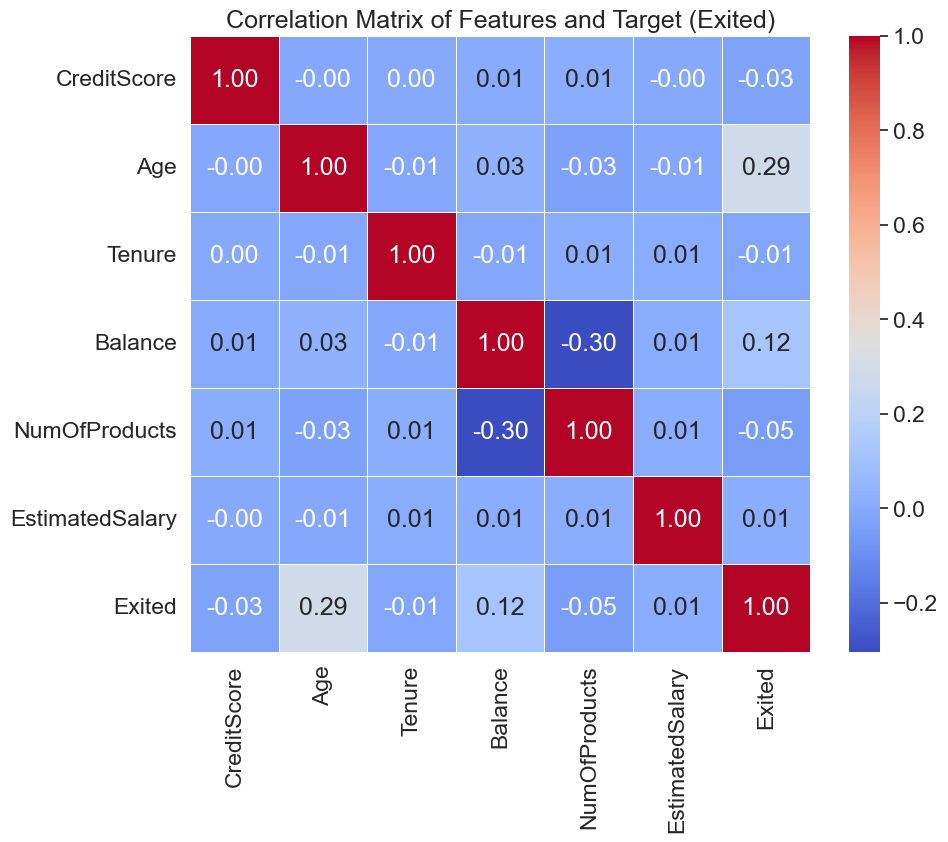

In [36]:
cols_correlation = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr = df[cols_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, fmt = '0.2f', cmap = 'coolwarm', lw = 0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

## Data Preprocessing

In [37]:
## Removing unnecessary column
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Define Features X and Y

In [39]:
X= df.drop('Exited',axis=1)      ## Independent Variable
y= df['Exited']                  ## Dependent Variable

### Data Encoding

To apply encoding to categorical columns in your dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)

In [40]:
X= pd.get_dummies(X, columns=['Geography', 'Gender'],drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Train Test Split

In [43]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

## Data Scaling

In [44]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [49]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## Define ML Pipeline

In [52]:
from sklearn.pipeline import Pipeline
Pipelines= {
    'Logistic Regression':Pipeline([
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

## Hyperparameter Tunning

In [54]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 200]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 10]
    }
}

optimal_model={}

for model_name, pipeline in Pipelines.items():
    print(f'--------------{model_name}--------------')
    grid_search= GridSearchCV(pipeline,param_grids[model_name],cv=5,n_jobs=-1,verbose=2)
    grid_search.fit(X_train_scaled,y_train)
    optimal_model[model_name]=grid_search.best_estimator_

    y_pred= optimal_model[model_name].predict(X_test_scaled)
    print(f'{model_name} Accuracy: {accuracy_score(y_test,y_pred)}')
    print(classification_report(y_test,y_pred))
    print('-----Confusion Matrix-------')
    print(confusion_matrix(y_test,y_pred))

--------------Logistic Regression--------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

-----Confusion Matrix-------
[[1543   64]
 [ 314   79]]
--------------Random Forest--------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Accuracy: 0.8665
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

-----Confus

## Evaluation of Best Model

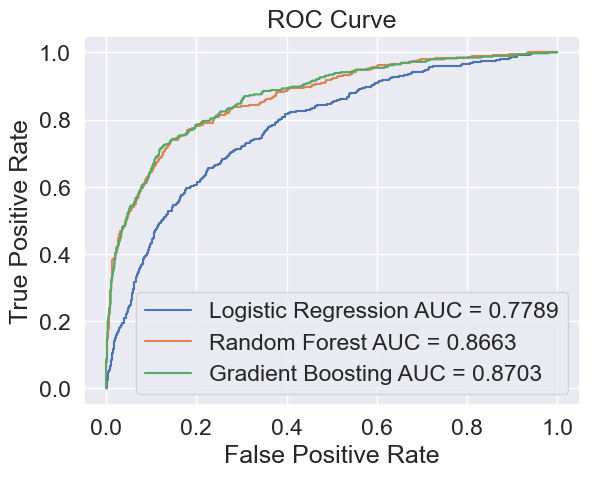

In [58]:
for model_name, model in optimal_model.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
    plt.plot(fpr, tpr, label=f'{model_name} AUC = {auc(fpr, tpr):.4f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [66]:
optimal_model

{'Logistic Regression': Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=42))]),
 'Random Forest': Pipeline(steps=[('classifier',
                  RandomForestClassifier(min_samples_split=10,
                                         random_state=42))]),
 'Gradient Boosting': Pipeline(steps=[('classifier',
                  GradientBoostingClassifier(max_depth=5, n_estimators=50,
                                             random_state=42))])}

## Conclusion :-

* Out of All the optimal_models Gradient Bossting is Giving Best Result with having "87 % Accuracy" 